# 1.时间序列模分析概述


时间序列是按照时间次序排列的随机变量序列，如：每日股票收盘价，每隔15min的风力发电量、每年的GDP等等。 从商业经济、管理或者工程科技，时间序列分析都占据着十分重要的作用，应用范围十分广泛。 下面，我们先通过几个案例学习时间序列分析的几个目标：

**（1）描述：** （以下例子参考于何书元老师的《应用时间序列分析》第一章 例1.2）

下面一份数据列出了某城市1991年至1996年中每个季度的民用煤消耗量（单位：吨），我们需要对民用煤消耗量进行合理的描述性分析。

In [3]:
# 引入相关工具包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
# plt.rcParams['font.sans-serif'] = ["SimHei"]  # 绘图显示中文
# plt.rcParams["axes.unicode_minus"] = False

In [4]:
# 读取数据并进行初步展示
time_index_list = ['1991Q1','1991Q2','1991Q3','1991Q4',
                   '1992Q1','1992Q2','1992Q3','1992Q4',
                   '1993Q1','1993Q2','1993Q3','1993Q4',
                   '1994Q1','1994Q2','1994Q3','1994Q4',
                   '1995Q1','1995Q2','1995Q3','1995Q4',
                   '1996Q1','1996Q2','1996Q3','1996Q4']
QTY_list = [6878.4,5343.7,4847.9,6421.9,
            6815.4,5532.6,4745.6,6406.2,
            6634.4,5658.5,4674.8,6645.5,
            7130.2,5532.6,4989.6,6642.3,
            7413.5,5863.1,4997.4,6776.1,
            7476.5,5965.5,5202.1,6894.1]
data = pd.DataFrame({'Year':time_index_list,
                     'QTY':QTY_list})
data.head()

,Year,QTY
0,1991Q1,6878.4
1,1991Q2,5343.7
2,1991Q3,4847.9
3,1991Q4,6421.9
4,1992Q1,6815.4


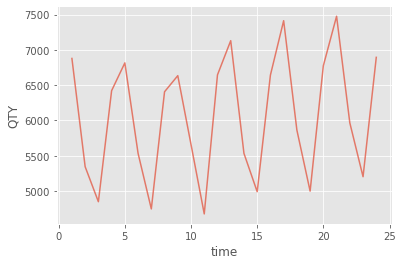

In [5]:
# 对民用煤消耗量做可视化展示：
plt.plot(np.arange(24)+1, data['QTY'],alpha=0.7)
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

从图中可以清晰看到，数据有强烈的周期信息，周期是4且民用煤消耗量呈现略微逐年增加的趋势。为了验证时间序列是否具有趋势信息和周期信息，我们需要对时间序列进行分解。在分解之前，我们先来学习时间序列的几个重要术语：

**时间序列**：按照时间次序排列的随机变量序列$X_1,X_2,...$称为时间序列。因此，时间序列中每一个时刻都是一个随机变量，而我们观察到的数值就是时间序列在某个时刻的观测值，用$x_1,x_2,...,x_N$表示。如：

|  序号    |  $\{X_t\}$        | $\{x_t\}$    |QTY     |
|  ----    | ----              |----          |  ----  |
| 0        | $X_0 $~ N(10,0.1) | $x_0$        | 11     |
| 1        | $X_1 $~ N(10,0.1) | $x_1$        | 9      |
| 2        | $X_2 $~ N(10,0.1) | $x_2$        | 10     |
| 3        | $X_3 $~ N(10,0.1) | $x_3$        | 12     |
| 4        | $X_4 $~ N(10,0.1) | $x_4$        | 11     |
| 5        | $X_5 $~ N(10,0.1) | $x_5$        | 9      |


**时间序列的分解**：大量的时间序列的观测样本都表现出趋势性、季节性和随机性，因此可以把时间序列分解为三个部分的叠加：
$$
X_t = T_t + S_t + R_t, t = 1,2,......   
$$

其中，$\{T_t\}$是趋势项（Trend），$\{S_t\}$是季节项（Seasonal），$\{R_t\}$是随机项（Random），也就是说时间序列$\{X_t\}$是这三项的叠加。有的同学可能在其他教材上看到时间序列还可以分解为趋势项、季节项、随机项还有**周期项**，实际上周期项往往是非固定频率的波动而季节项是固定频率的波动，二者有着显著的差别。再者，趋势可以被宽泛地定义为“平均水平上的长时期变化", 这个定义实际上是不准确的，举个例子：温度变化假如是50年一个周期，但是现阶段只有10年的温度数据，那么它可能呈现一种趋势，但是如果我们有几百年的数据，那么周期性比较明显了，因此20年数据中体现的趋势只不过是较大的周期中的一部分，最好的方法就是把趋势性和周期性结合起来考虑，而 $T_{t}$正是综合考虑了趋势性与周期性信息。

*下面给出一段时间序列分解的数学推导，感兴趣的同学可以仔细琢磨，不感兴趣的同学可以跳过此段！*

假如时间序列的季节项$\{S_t\}$只有一个周期s，那么$S(t+s)=S(t), \quad t=1,2,...$，于是季节项$\{S_t\}$在任何一个周期内的平均数是常数：$\frac{1}{s} \sum_{j=1}^{s} S(t+j)=c$。这个结论在周期函数中显而易见，如：$y = sin(x)$，周期是$2\pi$，那么在任意$2\pi$周期内$y = sin(x)$的平均值为0。可以使用python代码模拟下这个结论：

周期内的平均值为： -0.002712620294201122


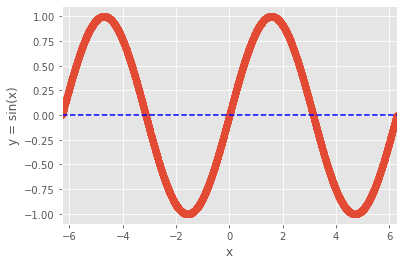

In [20]:
# 使用python模拟周期函数在周期内的平均值为常数c
x = np.random.uniform(-2*np.pi,2*np.pi,10000)
y = np.sin(x)
y_mean = np.mean(y)
print("周期内的平均值为：",y_mean)
plt.scatter(x,y)
plt.axhline(y=y_mean,c="blue",ls='--')
plt.xlim(-2*np.pi,2*np.pi)
plt.xlabel("x")
plt.ylabel("y = sin(x)")
plt.show()

因此，我们可以让时间序列分解式$X_{t}=T_{t}+S_{t}+R_{t}, \quad t=1,2, \cdots$ 中的趋势项的均值化为0：$X_{t}=\left(T_{t}+c\right)+\left(S_{t}-c\right)+R_{t}, \quad t=1,2, \cdots$。同时，我们也希望随机项的均值等于0，即：$\mathrm{E} R_{t}=0, \quad t=1,2, \cdots $.

现在，我们使用几个案例介绍常用的分解时间序列的方法：

- **方法1：分段趋势法：**

分段趋势法把趋势项定义成一段时间内的趋势，如民用煤消耗量数据中，从年平均的角度看，数据有缓慢逐年上升趋势，最简单的方法就是把趋势项$\{T_t\}$ 定义为年平均，即：

$$
\begin{aligned}
&\hat{T}_{1}=\cdots=\hat{T}_{4} = \frac{6878.4+5343.7+4847.9+6421.9}{4} = 5873.0 \\
&\hat{T}_{5}=\cdots=\hat{T}_{8} = \frac{6815.4+5532.6+4745.6+6406.2}{4} = 5875.0 \\
&\cdots \cdots \cdots \cdots \cdots \\
&\hat{T}_{21}=\cdots=\hat{T}_{24} = \frac{7476.5+5965.5+5202.1+6894.4}{4} = 6384.5
\end{aligned}
$$

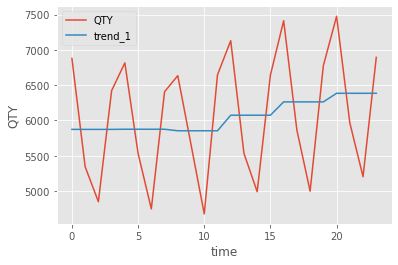

In [26]:
# 分段趋势法：分解趋势信息
time_index_list = ['1991Q1','1991Q2','1991Q3','1991Q4',
                   '1992Q1','1992Q2','1992Q3','1992Q4',
                   '1993Q1','1993Q2','1993Q3','1993Q4',
                   '1994Q1','1994Q2','1994Q3','1994Q4',
                   '1995Q1','1995Q2','1995Q3','1995Q4',
                   '1996Q1','1996Q2','1996Q3','1996Q4']
QTY_list = [6878.4,5343.7,4847.9,6421.9,
            6815.4,5532.6,4745.6,6406.2,
            6634.4,5658.5,4674.8,6645.5,
            7130.2,5532.6,4989.6,6642.3,
            7413.5,5863.1,4997.4,6776.1,
            7476.5,5965.5,5202.1,6894.1]
data = pd.DataFrame({'Year':time_index_list,
                     'QTY':QTY_list})
t_1 = [5873.0,5875.0,5853.3,6073.7,6262.6,6384.5] # 分段趋势
t_1 = [val for val in t_1 for _ in range(4)]   # 让一年内每个季度的趋势项都是该年的均值
data['trend_1'] = t_1
data[['QTY','trend_1']].plot()
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

由于时间序列分解为三个部分的叠加：
$$
X_t = T_t + S_t + R_t, t = 1,2,......   
$$

其中，$\{T_t\}$是趋势项（Trend），$\{S_t\}$是季节项（Seasonal），$\{R_t\}$是随机项（Random）。因此，时间序列的原始序列减去趋势项的估计值$\{\hat{T}_t \}$得到的数据只包含季节项和随机项。可以使用第k季度的均值作为季节想$S(k),\quad 1\leq k \leq 4$，因此：

$$
\begin{array}{ll}
\hat{S}(1) = \frac{6878.4 + 6815.4 + 6634.4 + 7130.2 + 7413.5 + 7476.5}{6} = 1004.4\\ 
\hat{S}(2) = \frac{5343.7 + 5532.6 + 5658.5 + 5532.6 + 5863.1 + 5965.5}{6} = -404.3 \\
\hat{S}(3) = \frac{4847.9 + 4745.6 + 4674.8 + 4989.6 + 4997.4 + 5202.1}{6} = -1144.1\\ 
\hat{S}(4) = \frac{6421.9 + 6406.2 + 6645.5 + 6642.3 + 6776.1 + 6894.1}{6} = 544.0 
\end{array}
$$

最后，使用原始时间序列减趋势项减季节项等于随机项的估计值，即：
$$
\hat{R}_{t}=x_{t}-\hat{T}_{t}-\hat{S}_{t}, \quad 1 \leqslant t \leqslant 24 .
$$

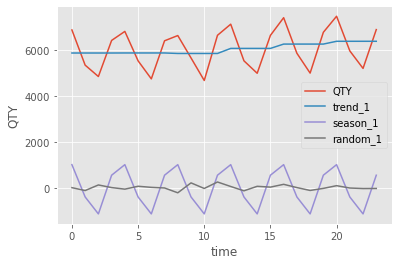

In [31]:
# 分段趋势法：分解季节项和随机项
season_1 = [1004.4,-404.3,-1144.1,544.0]
season_1 = season_1 * 6   # 6年
data['season_1'] = season_1
data['random_1'] = data['QTY'] - data['trend_1'] - data['season_1']
data[['QTY','trend_1','season_1','random_1']].plot()
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

最后，总结一下分解图的结论：从时间序列分析图中的趋势项可以看出，某城市1991年至1996年中每个季度的民用煤消耗量呈逐年递增的趋势；从时间序列分析图中的季节项可以看出，某城市1991年至1996年中每个季度的民用煤消耗量在每个季度均有波动，波动范围大约在-1000 ~ 1000，相对趋势项来说影响较小（大约为0 ~ 1/6）。

- **方法2：回归直线趋势法**